In [25]:
import sys
sys.path.append("../../src")

import numpy as np
import matplotlib.pyplot as plt

from qmarina import run_qmarina_on_simulator
from exact_solution import solve_master_equation, one_excited_emitter_state


In [3]:
def load_data(file_path):
    data = {f"{i:04b}": [] for i in range(16)}
    with open(file_path, 'r') as fp:
        lines = fp.readlines()

    for line in lines:
        if not line:
            continue
        l = line.strip().lstrip('[').rstrip(']')
        for l, v in zip(data.values(), l.split(',')):
            l.append(float(v.strip(' ')))

    return data

expt_data = load_data('./exp_data.txt')
sim_data = load_data('./sim_data.txt')

In [26]:
N = 3
g = 2
kappa = 5
times = np.linspace(0, 3, 101)

# qiskit_results = run_qmarina_on_simulator(N, g, kappa, times)
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)

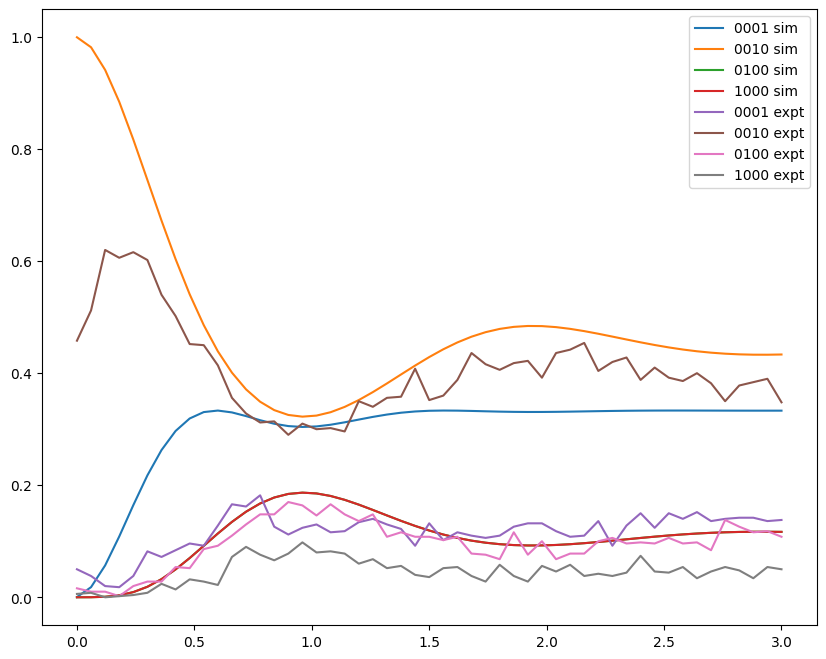

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

for k, v in sim_data.items():
    if k.count('1') > 1 or k == '0000':
        continue
    plt.plot(np.linspace(0, 3, 51), v, label=k + ' sim')

for k, v in expt_data.items():
    if k.count('1') > 1 or k == '0000':
        continue
    plt.plot(np.linspace(0, 3, 51), v, label=k + ' expt')

# for k, v in qutip_results.items():
#     plt.plot(times, v, label=k + ' QuTiP')

plt.legend()